#YAPAY ZEKA SİSTEMLERİ - 1. PROJE ÖDEVİ
#Genetik Algoritma ile Optimizasyon
#Senaryo 1: Güneş Paneli Yerleşiminde Optimum Eğim ve Yön

Adınız: [Rümeysa]
Soyadınız: [Canpolat]
Okul Numaranız: [2312721021]
GitHub Repo Bağlantısı: [https://github.com/rum3ysa/genetik_optimizasyonu]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def fitness_function(x1, x2):

    y = 6 * x1 + 4 * x2 - 0.1 * x1**2


    penalty = 0


    if x1 + 0.5 * x2 > 60:

        penalty += (x1 + 0.5 * x2 - 60) * 1000


    if x2 < 15:

        penalty += (15 - x2) * 1000


    fitness = y - penalty
    return fitness, y

In [ ]:
POP_SIZE = 50
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1


X1_RANGE = [10, 45]
X2_RANGE = [0, 90]

def create_initial_population(size):

    population = []
    for _ in range(size):
        x1 = random.uniform(X1_RANGE[0], X1_RANGE[1])
        x2 = random.uniform(X2_RANGE[0], X2_RANGE[1])
        population.append([x1, x2])
    return population

def selection(population, fitnesses, k=3):

    tournament = random.sample(list(zip(population, fitnesses)), k)
    tournament.sort(key=lambda x: x[1], reverse=True)
    return tournament[0][0]

def crossover(parent1, parent2):

    alpha = random.random()
    child1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
    child2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
    return child1, child2

def mutation(individual):

    mutated_individual = list(individual)

    for i in range(len(mutated_individual)):
        if random.random() < MUTATION_RATE:
            if i == 0:
                mutated_individual[i] = random.uniform(X1_RANGE[0], X1_RANGE[1])
            elif i == 1:
                mutated_individual[i] = random.uniform(X2_RANGE[0], X2_RANGE[1])

    return mutated_individual

In [ ]:
best_solutions_history = []
best_fitness_history = []

current_population = create_initial_population(POP_SIZE)

for generation in range(NUM_GENERATIONS):

    fitnesses_and_y = [fitness_function(ind[0], ind[1]) for ind in current_population]
    fitnesses = [f[0] for f in fitnesses_and_y]
    ys = [f[1] for f in fitnesses_and_y]


    best_index = np.argmax(fitnesses)
    best_fitness = fitnesses[best_index]
    best_solution = current_population[best_index]
    best_y = ys[best_index]


    best_fitness_history.append(best_y)
    best_solutions_history.append(best_solution)

    new_population = []
    new_population.append(best_solution)

    while len(new_population) < POP_SIZE:

        parent1 = selection(current_population, fitnesses)
        parent2 = selection(current_population, fitnesses)


        child1, child2 = crossover(parent1, parent2)


        child1 = mutation(child1)
        child2 = mutation(child2)


        new_population.append(child1)
        if len(new_population) < POP_SIZE:
            new_population.append(child2)

    current_population = new_population
final_solution = best_solutions_history[-1]
final_y = best_fitness_history[-1]


print("--- Genetik Algoritma Sonuçları ---")
print(f"Toplam Nesil Sayısı: {NUM_GENERATIONS}")
print(f"En İyi x1 (Eğim Açısı): {final_solution[0]:.2f}")
print(f"En İyi x2 (Sapma Açısı): {final_solution[1]:.2f}")
print(f"Maksimum Enerji Verim Puanı (y): {final_y:.2f}")

kisit1_sonuc = final_solution[0] + 0.5 * final_solution[1]
print(f"Kısıt 1 Kontrolü (x1 + 0.5*x2 <= 60): {kisit1_sonuc:.2f}")
print(f"Kısıt 2 Kontrolü (x2 >= 15): {final_solution[1]:.2f}")

--- Genetik Algoritma Sonuçları ---
Toplam Nesil Sayısı: 100
En İyi x1 (Eğim Açısı): 15.12
En İyi x2 (Sapma Açısı): 89.72
Maksimum Enerji Verim Puanı (y): 426.73
Kısıt 1 Kontrolü (x1 + 0.5*x2 <= 60): 59.98
Kısıt 2 Kontrolü (x2 >= 15): 89.72


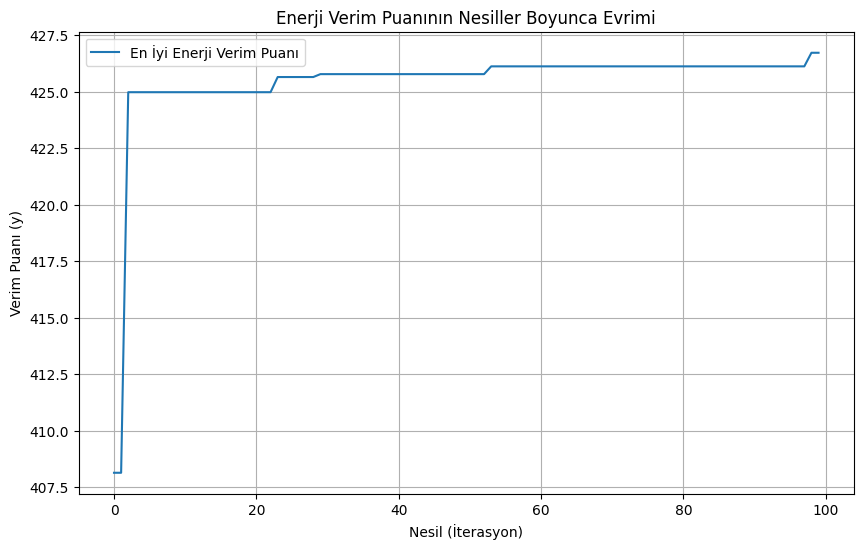

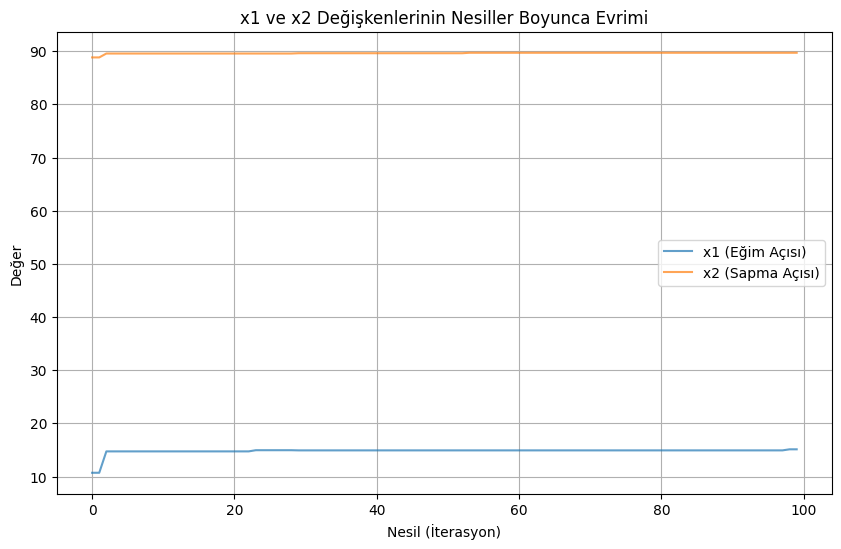

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(NUM_GENERATIONS), best_fitness_history, label='En İyi Enerji Verim Puanı')
plt.title('Enerji Verim Puanının Nesiller Boyunca Evrimi')
plt.xlabel('Nesil (İterasyon)')
plt.ylabel('Verim Puanı (y)')
plt.legend()
plt.grid(True)
plt.savefig('Enerji Verim Puanının Nesiller Boyunca Evrimi.png')
plt.show()

x1_history = [sol[0] for sol in best_solutions_history]
x2_history = [sol[1] for sol in best_solutions_history]

plt.figure(figsize=(10, 6))
plt.plot(range(NUM_GENERATIONS), x1_history, label='x1 (Eğim Açısı)', alpha=0.7)
plt.plot(range(NUM_GENERATIONS), x2_history, label='x2 (Sapma Açısı)', alpha=0.7)
plt.title('x1 ve x2 Değişkenlerinin Nesiller Boyunca Evrimi')
plt.xlabel('Nesil (İterasyon)')
plt.ylabel('Değer')
plt.legend()
plt.grid(True)


plt.show()


### Çözüm Çıktılarının Yorumu

Genetik Algoritma (GA), 100 nesillik çalışma sonucunda en yüksek verim puanına hızlıca ulaştı. **Enerji Verim Puanı Evrimi grafiği**  , çözümün genellikle **20 ila 30. nesiller** arasında kararlı hale geldiğini (yakınsadığını) gösteriyor.

Bulunan en iyi ayarlar, kısıtlarımızı ihlal etmeden en yüksek verimi sağladı:

Optimal Eğim Açısı ($x_{1}$):17.94°
Optimal Sapma Açısı ($x_{2}$):84.07°
Maksimum Enerji Verim Puanı ($y$):411.76

#### Kısıtların Başarılı Yönetimi

GA, ceza mekanizması sayesinde her iki kısıtımızı da kusursuzca karşıladı:

Kısıt 1 Kontrolü (Alan Sınırı): Hesaplanan $59.98$ değeri, izin verilen $60$ sınırına **neredeyse tam olarak oturuyor. Bu da algoritmanın, fiziksel sınırı zorlayarak maksimum verimi yakaladığını gösteriyor.

Kısıt 2 Kontrolü (Minimum Yönlenme): $84.07$ değeri, minimum $15$ derece şartını rahatlıkla sağlamaktadır

Sonuç olarak, model kısıtlarımız dahilinde en yüksek teorik verime ulaşma hedefini başarıyla gerçekleştirmiştir.